In [7]:
import sys
sys.path.append("../lib/python3.7/site-packages/")

import matplotlib.pyplot as plt

In [8]:
def plot_coherence (x, y, title):
    plt.figure(figsize=(15, 9))

    plt.plot(x, y)

    for a,b in zip(x, y):
        plt.annotate('(%s, %.6f)' % (a,b), xy=(a,b), textcoords='data')

    plt.title(title)

    plt.ylabel("cv_coherence")
    plt.xlabel("number of topics")
    plt.show()

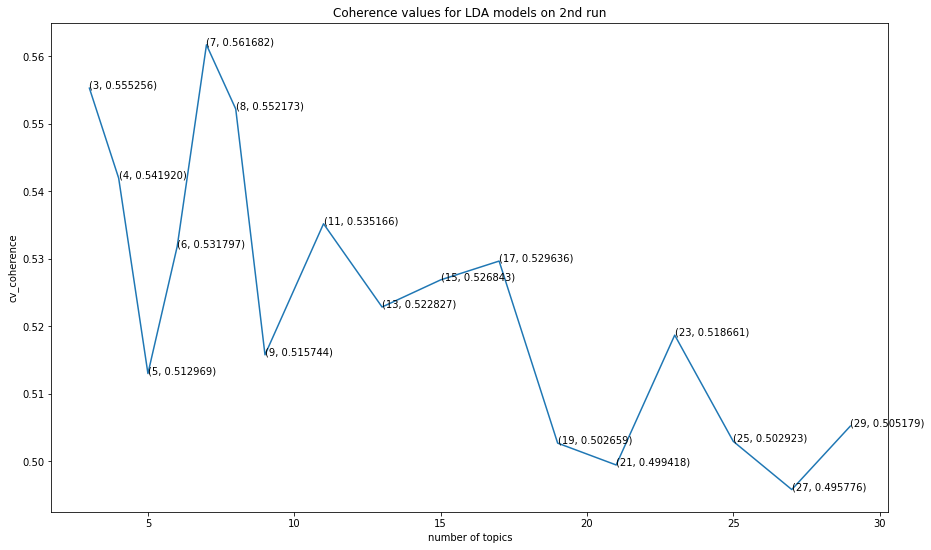

In [9]:
# Plot old LDA Coherence(cv) values
# run2: 11-29; run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run2lda_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))
with open("../data-out/lda_cv_11_29.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LDA models on 2nd run'

plot_coherence(old_x, old_y, title)

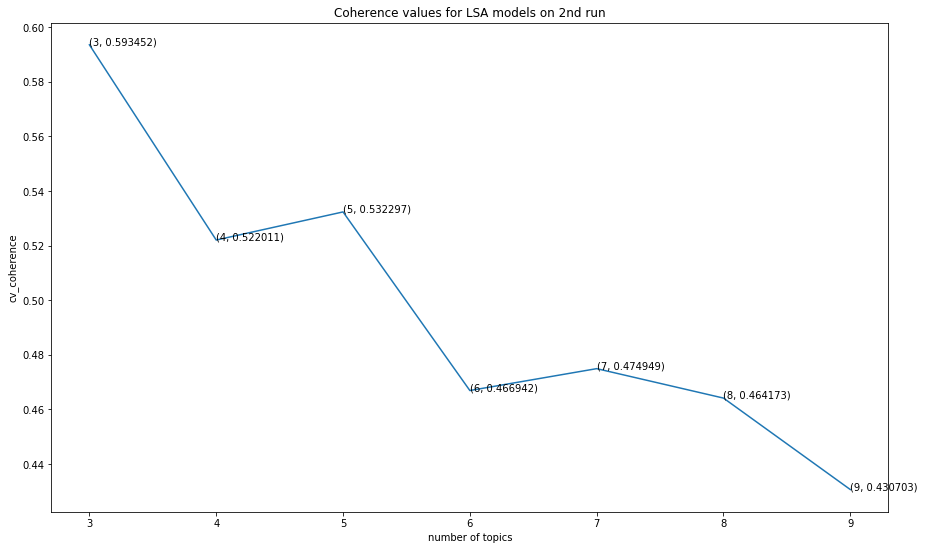

In [10]:
# Plot old LSA coherence values
# run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run2lsa_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LSA models on 2nd run'

plot_coherence(old_x, old_y, title)

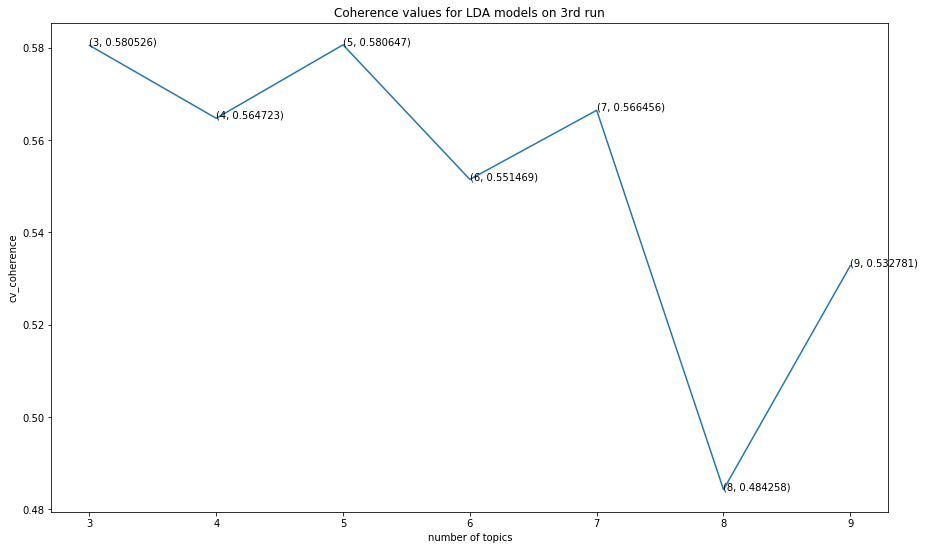

In [11]:
# Plot new LDA coherence values
# run4: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run3lda_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LDA models on 3rd run'

plot_coherence(old_x, old_y, title)

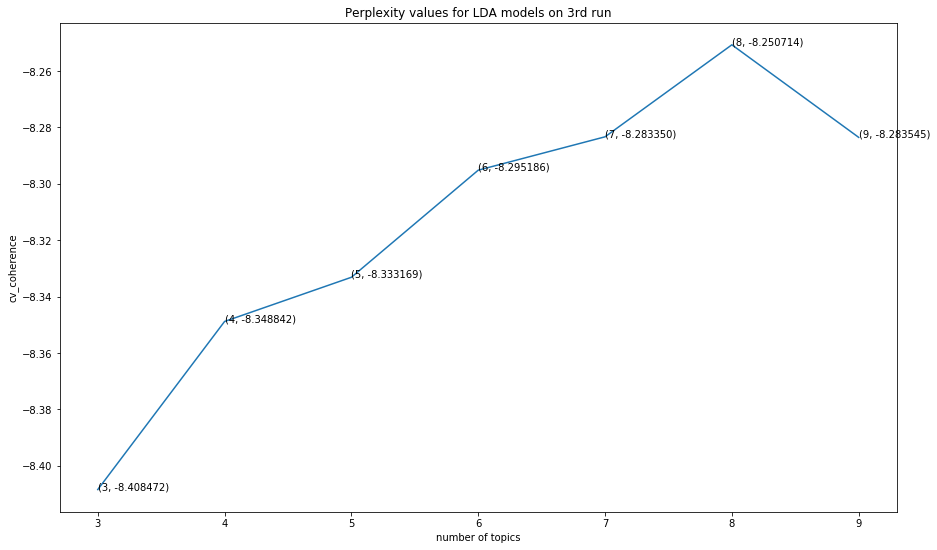

In [12]:
# Plot new LDA perplexity values
# run4: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run3lda_perplexity.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Perplexity values for LDA models on 3rd run'

plot_coherence(old_x, old_y, title)

In [32]:
import numpy as np
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary


N_DOCUMENTS = 517402
all_emails = []

for i in range(1, N_DOCUMENTS):
    with open("../dataset/clean/" + str(i) + ".txt", "r") as inf:
        for line in inf:
            all_emails.append(line.split(" "))

dictionary = Dictionary.load("../saved/emails.dictionary")

corpus = [dictionary.doc2bow(email) for email in all_emails]

name = "../saved/models/lda7.model"
model = LdaModel.load(name)

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(model, corpus, dictionary=dictionary)
vis

KeyboardInterrupt: 